<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/Logistic_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mglearn

     |████████████████████████████████| 540 kB 6.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b705470b03fb3e8b7a5f8445fb6f66ac8eb2c1be957947363280589ffc084876
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [20]:
# 데이터 로드
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import mglearn
import matplotlib.pyplot as plt
import numpy as np

iris_dataset = load_iris()

In [16]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X = iris_dataset.data[:, 2:]
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression(C=1, max_iter=100000).fit(X_train, y_train)
# 평가하기
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9732142857142857, 0.9736842105263158)

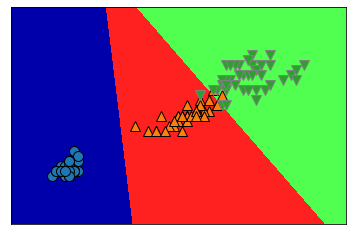

In [17]:
# 경계 시각화 
mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

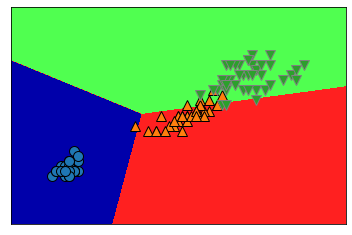

In [18]:
#svm 모델 적용
from sklearn.svm import LinearSVC

model_svc = LinearSVC().fit(X_train, y_train)
model_svc.score(X_train, y_train), model_svc.score(X_test, y_test)    

mglearn.plots.plot_2d_classification(model_svc, X_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

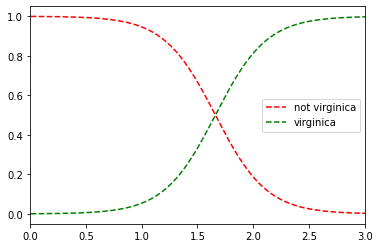

In [21]:
# 결정경계
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산
iris = load_iris()
X = iris.data[:, 3:] # 꽃잎의 너비
y = (iris.target == 2).astype(np.int) # 'virginica'

model = LogisticRegression().fit(X, y)

xx = np.linspace(-10, 10, 500).reshape(-1, 1) 
y_proba = model.predict_proba(xx)
plt.plot(xx, y_proba[:, 0], 'r--', label='not virginica')
plt.plot(xx, y_proba[:, 1], 'g--', label='virginica')
plt.xlim(0, 3)
plt.legend()